<a href="https://colab.research.google.com/github/mqquiroz/easywave/blob/main/Easywave_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://git.gfz-potsdam.de/id2/geoperil/easyWave/-/raw/master/bin/r34/easywave_r34_src.tar.gz?inline=false
!tar -xzf easywave_r34_src.tar.gz?inline=false
!rm easywave_r34_src.tar.gz\?inline\=false
%cd easywave/
!./configure
!make
!make install
%cd /usr/local/easywave/bin/
!chmod +x easywave
import os
cwd = os.getcwd()
os.environ['PATH'] += ":"+cwd
%cd /content/
!rm -r easywave
#!git clone https://git.gfz-potsdam.de/id2/geoperil/easyWave.git
#%cd easyWave/bin/r34/
#!tar -xzf easywave_r34_src.tar.gz
#%cd easywave/
#!./configure
#!make
#!make install
#%cd /usr/local/easywave/bin/
#!chmod +x easywave
#import os
#cwd = os.getcwd()
#os.environ['PATH'] += ":"+cwd

--2022-09-26 16:53:03--  https://git.gfz-potsdam.de/id2/geoperil/easyWave/-/raw/master/bin/r34/easywave_r34_src.tar.gz?inline=false
Resolving git.gfz-potsdam.de (git.gfz-potsdam.de)... 139.17.228.166
Connecting to git.gfz-potsdam.de (git.gfz-potsdam.de)|139.17.228.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3995705 (3.8M) [application/x-gzip]
Saving to: ‘easywave_r34_src.tar.gz?inline=false’

easywave_r34_src.ta 100%[===================>]   3.81M  3.94MB/s    in 1.0s    

2022-09-26 16:53:05 (3.94 MB/s) - ‘easywave_r34_src.tar.gz?inline=false’ saved [3995705/3995705]

/content/easywave
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking whether make supports nested variables... yes
checking for g++... g++
checking whether the C++ compiler work

In [2]:
!wget https://git.gfz-potsdam.de/id2/geoperil/easyWave/-/raw/master/data/examples.tar.gz?inline=false
!tar -xzf examples.tar.gz?inline=false
!rm examples.tar.gz?inline=false

--2022-09-26 16:53:19--  https://git.gfz-potsdam.de/id2/geoperil/easyWave/-/raw/master/data/examples.tar.gz?inline=false
Resolving git.gfz-potsdam.de (git.gfz-potsdam.de)... 139.17.228.166
Connecting to git.gfz-potsdam.de (git.gfz-potsdam.de)|139.17.228.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48632405 (46M) [application/x-gzip]
Saving to: ‘examples.tar.gz?inline=false’

examples.tar.gz?inl 100%[===================>]  46.38M  12.4MB/s    in 3.7s    

2022-09-26 16:53:24 (12.4 MB/s) - ‘examples.tar.gz?inline=false’ saved [48632405/48632405]



In [3]:
!mkdir simulacion
%cd simulacion
!easywave -grid /content/examples/e2Asean.grd -source /content/examples/BengkuluSept2007.flt -time 120
!wget https://raw.githubusercontent.com/mqquiroz/easywave/main/functions_easywave.py

/content/simulacion

easyWave ver.2013-04-11
Model time = 00:00:00,   elapsed: 0 msec
Model time = 00:10:00,   elapsed: 19 msec
Model time = 00:20:00,   elapsed: 54 msec
Model time = 00:30:00,   elapsed: 115 msec
Model time = 00:40:00,   elapsed: 203 msec
Model time = 00:50:00,   elapsed: 382 msec
Model time = 01:00:00,   elapsed: 616 msec
Model time = 01:10:00,   elapsed: 971 msec
Model time = 01:20:00,   elapsed: 1510 msec
Model time = 01:30:00,   elapsed: 2175 msec
Model time = 01:40:00,   elapsed: 3041 msec
Model time = 01:50:00,   elapsed: 4135 msec
Model time = 02:00:00,   elapsed: 5402 msec
--2022-09-26 16:53:34--  https://raw.githubusercontent.com/mqquiroz/easywave/main/functions_easywave.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3933 (3.8K)

In [4]:
from functions_easywave import ew2py
from functions_easywave import load_surfer
import numpy as np
import matplotlib.pyplot as plt

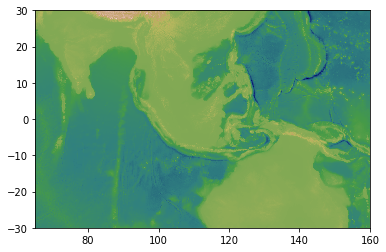

In [5]:
lon_x, lat_y, grd, (ny,nx) =load_surfer('/content/examples/e2Asean.grd')
lon_x=lon_x.reshape(ny,nx)
lat_y=lat_y.reshape(ny,nx)
grid=grd.reshape(ny,nx)

#grilla
#plt.contour(lon_x,lat_y,grid,0,colors='k')
cmap=plt.cm.gist_earth
plt.pcolormesh(lon_x,lat_y,grid,cmap=cmap)

plt.show()

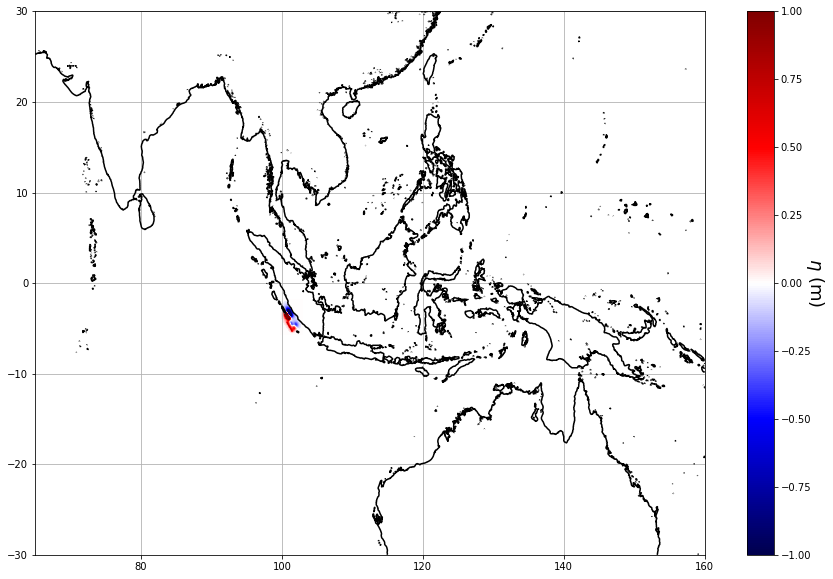

In [6]:
# Condicion Inicial
fileName = 'eWave.2D.00000.ssh'.format(0)# {0:05d}'eWave.2D.sshmax'
lon, lat, h0 = ew2py(fileName)

alto = 10 
ancho = 15
fig, ax = plt.subplots(figsize=(ancho,alto))

cmap2=plt.cm.seismic
ax.contour(lon_x,lat_y,grid,0,colors='k')
cond_ini = ax.pcolormesh(lon,lat,h0[:-1,:-1],cmap=cmap2,vmin=-1.0,vmax=1.0)

cbar = plt.colorbar(cond_ini)
cbar.set_label(r'$\eta$ (m)', rotation=270,fontsize=18, ha='center', va='center')
#plt.ylim(-38,-22)
#plt.xlim(-85,-68)
#plt.axes().set_aspect('equal')
plt.grid()
plt.show()

In [7]:
#!conda --version
!pip install -q condacolab
import condacolab
condacolab.install()

!conda create --name pygmt-env gmt
!conda activate pygmt-env
!conda install pygmt
!pip install --force-reinstall pandas

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:33
🔁 Restarting kernel...
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local/envs/pygmt-env

  added / updated specs:
    - gmt


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blosc-1.21.1               |       h83bc5f7_3          47 KB  conda-forge
    boost-cpp-1.78.0           |       h75c5d50_1        17.1 MB  conda-forge
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    cairo-1.16.0               |    ha61ee94_1014         1.5 MB  conda-forge


In [69]:
def file_netcdf(name,grid,descripcion,dt,ttotal): # name 'sample.nc', grid:'/content/examples/e2Asean.grd', descripcion: "Simulacion MQ1"
  import numpy as np
  import netCDF4 as nc4
  from scipy.interpolate import griddata
  from scipy.interpolate import RegularGridInterpolator
  lon_x, lat_y, grd, (ny,nx) =load_surfer(grid)
  lon_x=lon_x.reshape(ny,nx)
  lat_y=lat_y.reshape(ny,nx)
  grid=grd.reshape(ny,nx)
  t = np.arange(0,ttotal+dt,dt)
  pasos = int(ttotal/dt)+1

  f = nc4.Dataset(name,'w', format='NETCDF4') #'w' stands for write
  f.createDimension('lon',nx)
  f.createDimension('lat',ny)
  f.createDimension('time',pasos)

  longitude = f.createVariable('Longitude', 'f4', 'lon')
  latitude = f.createVariable('Latitude', 'f4', 'lat')  
  time = f.createVariable('Time', 'i4', 'time')
  ssh = f.createVariable('SSH', 'f4', ('time', 'lat' , 'lon'))

  longitude[:] = lon_x[0,:]
  latitude[:]  = lat_y[:,0]
  time[:] = t
  lon_lat = [latitude[:],longitude[:]]
  print([longitude[:], latitude[:]])

  #Add global attributes
  f.description = descripcion
  #Add local attributes to variable instances
  longitude.units = 'degrees'
  latitude.units = 'degrees'
  time.units = 'minutes'
  ssh.units = 'meters'

  for i in range(0,pasos):
    fileName= 'eWave.2D.{0:05d}.ssh'.format(i*60*dt)
    lon, lat, h0 = ew2py(fileName)
    interp = RegularGridInterpolator((lat, lon), h0,bounds_error=False, fill_value=None)
    data = interp(lon_lat)
    #ssh[i,:,:] = data
  
  f.close
  return f


In [70]:
jaja = file_netcdf('sim1.nc','/content/examples/e2Asean.grd','Simulacion MQ',5,120)

[masked_array(data=[ 65.     ,  65.03334,  65.06668, ..., 159.95001,
                   159.98335, 160.0167 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32), masked_array(data=[-30.      , -29.966658, -29.933315, ...,  29.949993,
                    29.983335,  30.016678],
             mask=False,
       fill_value=1e+20,
            dtype=float32)]


ValueError: ignored

In [6]:
%cd simulacion/

import pygmt
from functions_easywave import ew2py
from functions_easywave import load_surfer
import numpy as np
import matplotlib.pyplot as plt
#pygmt.show_versions()

#fig = pygmt.Figure()
#fig.coast(region=[0, 360, -80, 80], projection="M0/0/10c", frame="a30fg", shorelines=0.5)
#fig.show()

fileName = 'eWave.2D.00000.ssh'.format(0)# {0:05d}'eWave.2D.sshmax'
lon, lat, h0 = ew2py(fileName)

fig = pygmt.Figure()
fig.grdimage(grid=h0[:-1,:-1], cmap="vik", projection="R15c", frame=True)
fig.show()

/content/simulacion


GMTInvalidInput: ignored

In [10]:
int(10/2)

5